Question1
======

### 1_데이터 정리 


In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib as plt

In [2]:
os.chdir(r"C:\Users\최보경\Desktop\2019SN\GrowthHackers\Education\Session Slides\Session 04. 파이썬 라이브러리 활용 기초\데이터셋")

In [3]:
cctv_df=pd.read_csv("CCTV_in_Seoul.csv")
pop_df=pd.read_excel("population_in_Seoul.xls",header=2, usecols = 'B, D, G, J, N', encoding='utf-8')

In [4]:
#cctv_df 오름차순 정렬
cctv_df.sort_values(by = '소계', ascending = True)
cctv_df.reset_index(drop=True,inplace=True)
cctv_df.head()

,기관명,소계,2013년도 이전,2014년,2015년,2016년
0,강남구,3238,1292,430,584,932
1,강동구,1010,379,99,155,377
2,강북구,831,369,120,138,204
3,강서구,911,388,258,184,81
4,관악구,2109,846,260,390,613


In [5]:
#최근증가율 컬럼 생성
cctv_df['최근증가율']=(cctv_df['2016년']+cctv_df['2015년']+cctv_df['2014년'])/cctv_df['2013년도 이전']*100
#최근증가율 컬럼을 기준으로 내림차순 정렬
cctv_df.sort_values(by = '최근증가율', ascending = False).head()

,기관명,소계,2013년도 이전,2014년,2015년,2016년,최근증가율
22,종로구,1619,464,314,211,630,248.922414
9,도봉구,825,238,159,42,386,246.638655
12,마포구,980,314,118,169,379,212.101911
8,노원구,1566,542,57,451,516,188.929889
1,강동구,1010,379,99,155,377,166.490765


In [6]:
#불필요 컬럼 삭제
del cctv_df["2013년도 이전"]
del cctv_df["2014년"]
del cctv_df["2015년"]
del cctv_df["2016년"]
#컬럼 이름 변경
cctv_df.rename(columns = {cctv_df.columns[0]:'구별'},inplace=True)

In [7]:
#cctv완료
cctv_df.head()

,구별,소계,최근증가율
0,강남구,3238,150.619195
1,강동구,1010,166.490765
2,강북구,831,125.203252
3,강서구,911,134.793814
4,관악구,2109,149.290780


In [8]:
#pop_df 합계 행의 삭제
pop_df.drop([0],inplace=True)

In [9]:
#컬럼 이름 정리
pop_df.rename(columns = {pop_df.columns[0]:'구별',pop_df.columns[1]:'인구수',
                           pop_df.columns[2]:'한국인',pop_df.columns[3]:'외국인'
                           ,pop_df.columns[4]:'고령자'},inplace=True)
#인덱스 리셋
pop_df.reset_index(drop=True,inplace=True)
#비율 컬럼 생성
pop_df['외국인비율']=pop_df['외국인']/pop_df['인구수']*100
pop_df['고령자비율']=pop_df['고령자']/pop_df['인구수']*100
pop_df.head()

,구별,인구수,한국인,외국인,고령자,외국인비율,고령자비율
0,종로구,163026,153065,9961,26742,6.110068,16.403518
1,중구,135633,125725,9908,22005,7.305007,16.223928
2,용산구,245090,228999,16091,37640,6.565343,15.357624
3,성동구,316463,308221,8242,42767,2.604412,13.514060
4,광진구,371063,355559,15504,45619,4.178266,12.294139


In [10]:
pop_df.dtypes

구별        object
인구수        int64
한국인        int64
외국인        int64
고령자        int64
외국인비율    float64
고령자비율    float64
dtype: object

In [11]:
#cctv_df 와 pop_df merge
data_result=pd.merge(cctv_df,pop_df,on='구별')
data_result.head()

,구별,소계,최근증가율,인구수,한국인,외국인,고령자,외국인비율,고령자비율
0,강남구,3238,150.619195,547453,542364,5089,67085,0.929578,12.254020
1,강동구,1010,166.490765,431920,427573,4347,58770,1.006436,13.606686
2,강북구,831,125.203252,322915,319164,3751,58196,1.161606,18.022080
3,강서구,911,134.793814,603611,596949,6662,79660,1.103691,13.197241
4,관악구,2109,149.290780,520040,501957,18083,72249,3.477233,13.892970


### 2_PYPLOT 회귀직선

In [12]:
import matplotlib.pyplot as plt #matplotlib 한글 처리해주는 과정
import platform                 

from matplotlib import font_manager, rc
plt.rcParams['axes.unicode_minus']= False

if platform.system() == 'Windows':#윈도우 사용자
    path = 'c:/Windows/Fonts/malgun.ttf'
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)

In [13]:
#회귀 직선 만들기
fp1=np.polyfit(data_result['인구수'],data_result['소계'],1)
fp1

array([1.07336946e-03, 1.08384235e+03])

In [14]:
f1=np.poly1d(fp1)
f1

poly1d([1.07336946e-03, 1.08384235e+03])

In [15]:
fx1=data_result['인구수']
data_result['오차']=np.abs(data_result['소계']-f1(fx1))

In [16]:
#인덱스 세팅
data_result.set_index('구별',drop=True,inplace=True)
#오차를 기준으로 내림차순 정렬
data_result.sort_values(by='오차',inplace=True,ascending=False)

In [17]:
#결과
data_result.head()

,소계,최근증가율,인구수,한국인,외국인,고령자,외국인비율,고령자비율,오차
구별,,,,,,,,,
강남구,3238,150.619195,547453,542364,5089,67085,0.929578,12.254020,1566.538319
양천구,2482,34.671731,468145,464185,3960,58045,0.845892,12.398936,895.665104
강서구,911,134.793814,603611,596949,6662,79660,1.103691,13.197241,820.739963
용산구,2096,53.216374,245090,228999,16091,37640,6.565343,15.357624,749.085528
서초구,2297,63.371266,438163,433951,4212,54751,0.961286,12.495578,742.846867


Question 2
=======

### 1_MATPLOTLIB 시각화

In [18]:
#오차기준 상위5개 구와 하위 5개 구 label 리스트 준비
top_list=list(data_result['오차'].head(5).index)
tail_list=list(data_result['오차'].tail(5).index)

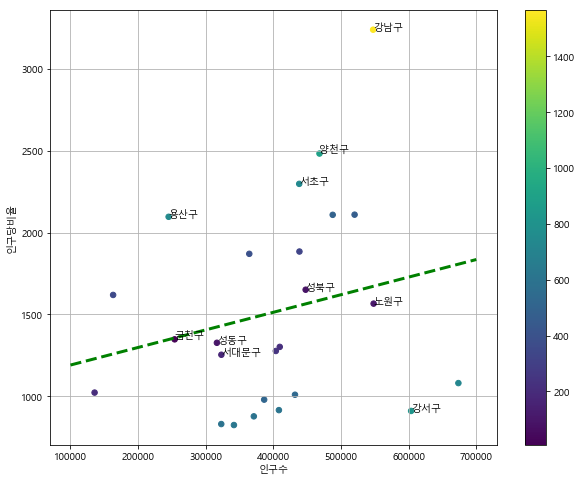

In [19]:
#plt.scatter and line
fx2=np.linspace(100000, 700000, 100)

plt.figure(figsize=(10,8))
plt.scatter(data_result['인구수'],data_result['소계'],c=data_result['오차'].values,s=30)
plt.plot(fx2, f1(fx2), ls='--', lw=3, color ='g')
plt.xlabel('인구수')
plt.ylabel('인구당비율')
plt.grid()

#plt.text
for i in top_list:
    plt.text(data_result.at[i,'인구수'],data_result.at[i,'소계'],i)
for i in tail_list:
    plt.text(data_result.at[i,'인구수'],data_result.at[i,'소계'],i)

#plt.colormap
plt.colorbar()

plt.show()

### 2_시사점
####  위 그래프를 통해 살펴본 바 강남구, 양천구, 서초구, 용산구, 강서구가 높은 오차를 보였다. 반면 금천구, 성북구, 성동구, 서대문구, 노원구는 낮은 오차를 보였다. 일반적으로 회귀직선과 각 데이터포인트간의 오차가 큰 편이므로 구별 인구수와 CCTV 수는 약한 상관관계를 가진다는 것을 확인할 수 있다. 